In [633]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [634]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [635]:
data.shape

(1460, 81)

In [636]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [637]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

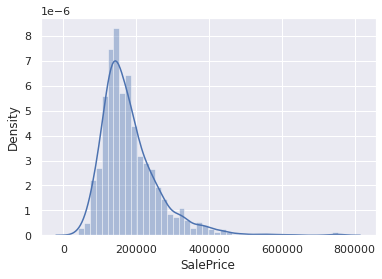

In [638]:
sns.distplot(y_train)

In [639]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета

# Оказывается в данных есть выбросы.
X_test.isin([np.nan]).sum()


MSSubClass        0
MSZoning          0
LotFrontage      82
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 79, dtype: int64

In [640]:
# Заменим выбросы на среднее значение в данной колонке.

X_test = X_test.fillna(X_test.mean())
X_train = X_train.fillna(X_train.mean())
print(X_train.shape, X_test.shape)

(1022, 79) (438, 79)


In [641]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Выберем числовые признаки из нашего датасета.

numeric_features = list(X_train.dtypes[X_train.dtypes != "object"].index)
X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]

In [642]:
LR = LinearRegression().fit(X_train_num, y_train)
print('Linear Regression. Train score: {}, Test score {}'.format(LR.score(X_train_num, y_train), LR.score(X_test_num, y_test)))

Linear Regression. Train score: 0.804515401124162, Test score 0.8240650978474798


In [643]:
Rid = Ridge().fit(X_train_num, y_train)
print('Ridge. Train score: {}, Test score {}'.format(Rid.score(X_train_num, y_train), Rid.score(X_test_num, y_test)))

Ridge. Train score: 0.8045137453176897, Test score 0.8241847850284749


In [644]:
Las = Lasso().fit(X_train_num, y_train)
print('Lasso. Train score: {}, Test score {}'.format(Las.score(X_train_num, y_train), Las.score(X_test_num, y_test)))

Lasso. Train score: 0.8045153825798179, Test score 0.824078827719559


$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [645]:
# Определите RMSE через функцию sklearn.metrics.make_scorer

from sklearn.metrics import make_scorer

def RMSE(y, a_x, **kwargs):
  return np.sqrt(np.mean(np.sqrt(y - a_x)) / len(y))

score_RMSE = make_scorer(RMSE)

In [646]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

In [647]:
model = LinearRegression().fit(X_train_num, y_train)

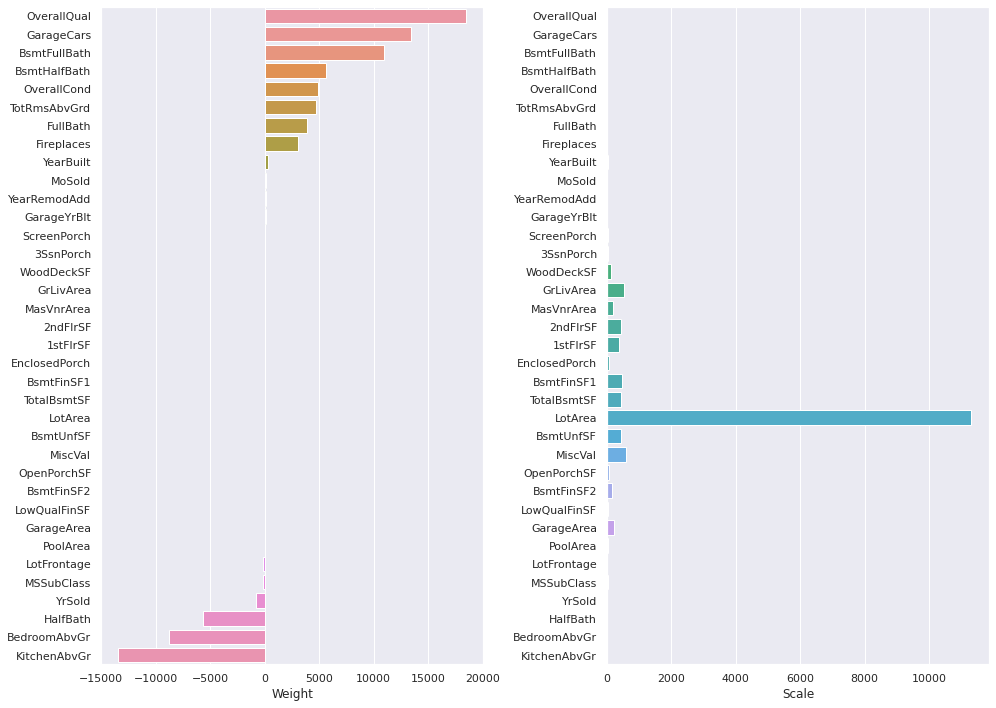

In [648]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [649]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)



In [650]:
model = LinearRegression().fit(X_train_scaled, y_train)

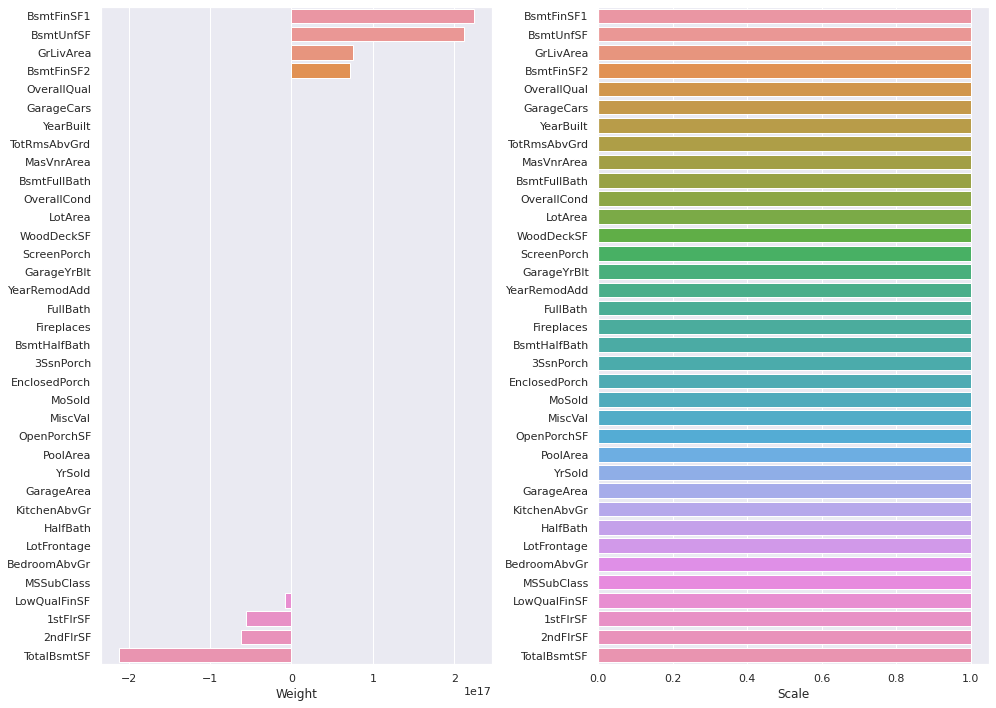

In [651]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

In [652]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV

# Для LinearRegression подбирать смысла нет, там нет параметра alpha, для Ridge и Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
param_grid = {'alpha':np.linspace(0.1, 2., 50)}

In [653]:
L = GridSearchCV(Lasso(), param_grid=param_grid)
L.fit(X_train_num, y_train)
L.best_params_


{'alpha': 0.1}

In [654]:
pipeline = Pipeline([("scaler", StandardScaler()), ("l", Lasso(alpha=0.1) ) ])
pipeline.fit(X_train_num, y_train)
print('Lasso. Train score: {}, Test score {}'.format(pipeline.score(X_train_num, y_train),
                                                     pipeline.score(X_test_num, y_test)))

Lasso. Train score: 0.8045154010250001, Test score 0.8240661892922989


In [655]:

R = GridSearchCV(Ridge(), param_grid=param_grid)
R.fit(X_train_num, y_train)
R.best_params_

{'alpha': 2.0}

In [656]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
pipeline = Pipeline([("scaler", StandardScaler()), ("l", Ridge(alpha=2.) ) ])
pipeline.fit(X_train_num, y_train)
print('Ridge. Train score: {}, Test score {}'.format(pipeline.score(X_train_num, y_train),
                                                     pipeline.score(X_test_num, y_test)))

Ridge. Train score: 0.8045130651635554, Test score 0.8243107764426039


In [657]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [658]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
680,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,BLQ,BLQ,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
545,RL,Pave,NotGiven,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,Gd,PConc,Gd,Gd,No,GLQ,LwQ,GasA,Gd,Y,SBrkr,Gd,Typ,NotGiven,Attchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
199,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
664,RL,Pave,NotGiven,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Ex,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,New,Partial
740,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,Gd,BrkTil,Fa,Fa,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NotGiven,Detchd,Unf,TA,Gd,Y,NotGiven,GdPrv,NotGiven,WD,Abnorml


In [659]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

data =  pd.get_dummies(X)

X_train_scaled = pd.get_dummies(X_train)
X_test_scaled = pd.get_dummies(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)



(1022, 294) (438, 276)


In [660]:
from sklearn.compose import ColumnTransformer
print("Size after OneHot:", X_train_scaled.shape)


Size after OneHot: (1022, 294)


In [661]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("r", Ridge() ) ])
ridge_pipeline.fit(X_train_scaled, y_train)
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("l", Lasso() ) ])
lasso_pipeline.fit(X_train_scaled, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('l',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [662]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 27


In [663]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV

param_grid = {'r__alpha':np.linspace(0.1, 2., 50)}
R = GridSearchCV(ridge_pipeline, param_grid=param_grid)
R.fit(X_train_scaled, y_train)
R.best_params_


{'r__alpha': 0.1}

In [664]:
param_grid = {'l__alpha':np.linspace(0.1, 2., 50)}
L = GridSearchCV(lasso_pipeline, param_grid=param_grid)
L.fit(X_train_scaled, y_train)
L.best_params_


{'l__alpha': 2.0}

(0.0, 1.460725980037334e-09)

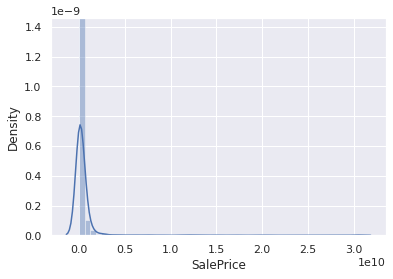

In [665]:
error = (y_train - lasso_pipeline.predict(X_train_scaled)) ** 2
ax = sns.distplot(error)
ax.set_ylim([0, max([p.get_height() for p in ax.patches])])

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [666]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO
grid = np.linspace(np.min(error), np.max(error), 100)
cells, numer_cell = np.unique(np.digitize(error, grid), return_counts=True)
cell_sum = np.cumsum(numer_cell)
fitting_cells = cells[cell_sum / cell_sum[-1] < 0.95]



In [667]:
mask = np.isin(np.digitize(error, grid), fitting_cells)

(0.0, 1.0598040296514596e-08)

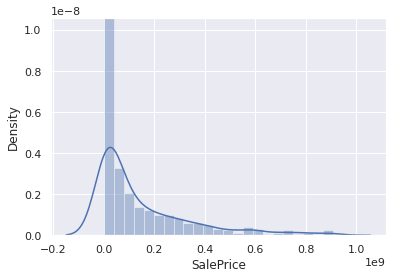

In [668]:
error = (y_train[mask] - lasso_pipeline.predict(X_train_scaled[mask])) ** 2
ax = sns.distplot(error)
ax.set_ylim([0, max([p.get_height() for p in ax.patches])])

In [669]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_transformer = ColumnTransformer(
           [('scale', StandardScaler(), list(map(lambda x : X_train.columns.get_loc(x), numeric_features))),
            ('encode', OneHotEncoder(), list(map(lambda x : X_train.columns.get_loc(x), categorical)))])
column_transformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scale',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [0, 2, 3, 16, 17, 18, 19, 25, 33, 35, 36, 37,
                                  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53,
                                  55, 58, 60, 61, 65, 66, 67, ...]),
                                ('encode',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  20, 21, 22, 23, 24, 26, 27, 28, 29,

In [674]:
lasso_pipeline = Pipeline([("transformer", column_transformer), ("l", Lasso() ) ])
lasso_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  [0, 2, 3, 16, 17, 18, 19, 25,
                                                   33, 35, 36, 37, 42, 43, 44,
                                                   45, 46, 47, 48, 49, 50, 51,
                                                   53, 55, 58, 60, 61, 65, 66,
                                                   67, ...]),
                                                 ('encode',
                          

In [673]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO
y_pred = lasso_pipeline.predict(X_train)
RMSE(y_train, y_pred)


0.3083921188612184